In [24]:
# Import the dependencis.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [25]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [26]:
# Add the latitudes and longitudes to the a list.
coordinates = list(lat_lngs)

In [27]:
# Use the citipy module to determin city based on latitude and longitude
from citipy import citipy

In [28]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [29]:
# Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("____________________________")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url +"&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
____________________________
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | staraya poltavka
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | kurilsk
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | leningradskiy
Processing Record 13 of Set 1 | nalut
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 1 | aklavik
Processing Record 17 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 

Processing Record 35 of Set 4 | clyde river
Processing Record 36 of Set 4 | waipawa
Processing Record 37 of Set 4 | pochutla
Processing Record 38 of Set 4 | carnarvon
Processing Record 39 of Set 4 | wazzan
City not found. Skipping...
Processing Record 40 of Set 4 | mehamn
Processing Record 41 of Set 4 | isangel
Processing Record 42 of Set 4 | bonavista
Processing Record 43 of Set 4 | alice springs
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | bathsheba
Processing Record 46 of Set 4 | mae sai
Processing Record 47 of Set 4 | jinchang
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | cayenne
Processing Record 50 of Set 4 | soverato
Processing Record 1 of Set 5 | aguimes
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | verkhnyaya inta
Processing Record 6 of Set 5 | armstrong
Processing Record 7 of Set 5 | sao filipe
Processing Record 8 of

Processing Record 23 of Set 8 | prince rupert
Processing Record 24 of Set 8 | pecos
Processing Record 25 of Set 8 | gao
Processing Record 26 of Set 8 | ginda
Processing Record 27 of Set 8 | taoudenni
Processing Record 28 of Set 8 | chilmari
Processing Record 29 of Set 8 | jacareacanga
Processing Record 30 of Set 8 | portland
Processing Record 31 of Set 8 | rincon
Processing Record 32 of Set 8 | valparaiso
Processing Record 33 of Set 8 | poum
Processing Record 34 of Set 8 | totoral
Processing Record 35 of Set 8 | asau
Processing Record 36 of Set 8 | pedreiras
Processing Record 37 of Set 8 | marshalltown
Processing Record 38 of Set 8 | shitanjing
Processing Record 39 of Set 8 | lebu
Processing Record 40 of Set 8 | khonuu
City not found. Skipping...
Processing Record 41 of Set 8 | volga
Processing Record 42 of Set 8 | hebi
Processing Record 43 of Set 8 | general roca
Processing Record 44 of Set 8 | porvoo
Processing Record 45 of Set 8 | safaga
Processing Record 46 of Set 8 | severo-kurils

Processing Record 10 of Set 12 | elizabeth city
Processing Record 11 of Set 12 | ipixuna
Processing Record 12 of Set 12 | port hawkesbury
Processing Record 13 of Set 12 | yusva
City not found. Skipping...
Processing Record 14 of Set 12 | gwalior
Processing Record 15 of Set 12 | darnah
Processing Record 16 of Set 12 | kawalu
Processing Record 17 of Set 12 | high prairie
Processing Record 18 of Set 12 | harper
Processing Record 19 of Set 12 | quatre cocos
Processing Record 20 of Set 12 | norheimsund
Processing Record 21 of Set 12 | kuusamo
Processing Record 22 of Set 12 | ust-charyshskaya pristan
Processing Record 23 of Set 12 | doha
Processing Record 24 of Set 12 | kindu
Processing Record 25 of Set 12 | zhigansk
Processing Record 26 of Set 12 | hervey bay
Processing Record 27 of Set 12 | pacific grove
Processing Record 28 of Set 12 | minsk
Processing Record 29 of Set 12 | aksu
Processing Record 30 of Set 12 | saint anthony
Processing Record 31 of Set 12 | dhanera
Processing Record 32 of

In [30]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.0033,24.7314,52.84,76,41,6.20,ZA,2021-10-10 21:10:08
1,Katsuura,35.1333,140.3000,71.71,71,77,12.95,JP,2021-10-10 21:09:09
2,Staraya Poltavka,50.4772,46.4814,45.34,51,0,4.14,RU,2021-10-10 21:10:09
3,Chokurdakh,70.6333,147.9167,17.51,89,100,5.79,RU,2021-10-10 21:06:26
4,Hilo,19.7297,-155.0900,80.28,90,90,8.05,US,2021-10-10 21:10:09


In [31]:
# Reoder the columns of the DataFrame

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kruisfontein,ZA,2021-10-10 21:10:08,-34.0033,24.7314,52.84,76,41,6.20
1,Katsuura,JP,2021-10-10 21:09:09,35.1333,140.3000,71.71,71,77,12.95
2,Staraya Poltavka,RU,2021-10-10 21:10:09,50.4772,46.4814,45.34,51,0,4.14
3,Chokurdakh,RU,2021-10-10 21:06:26,70.6333,147.9167,17.51,89,100,5.79
4,Hilo,US,2021-10-10 21:10:09,19.7297,-155.0900,80.28,90,90,8.05
...,...,...,...,...,...,...,...,...,...
553,Dashitou,CN,2021-10-10 21:12:48,43.3067,128.5114,39.09,73,0,8.14
554,Pilar,BR,2021-10-10 21:10:07,-9.5972,-35.9567,78.73,79,100,8.16
555,Guozhen,CN,2021-10-10 21:12:48,34.3659,107.3590,44.92,84,93,1.19
556,Kununurra,AU,2021-10-10 21:12:49,-15.7667,128.7333,78.78,73,75,6.91


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# # Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


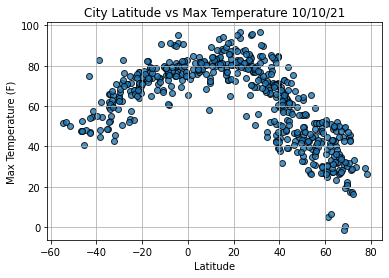

In [34]:
# Import the time module
import time

# Build the scater plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths =1, marker= "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

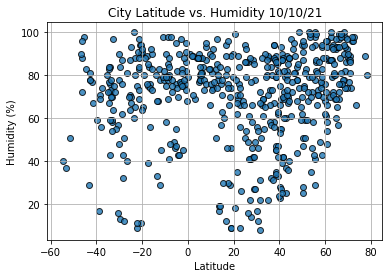

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

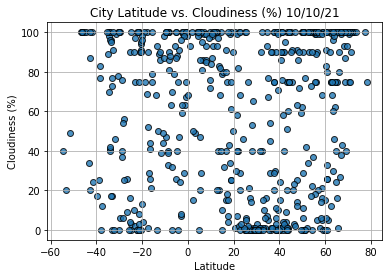

In [36]:
# Build the scatter plots for latitude vs.cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths=1, marker="o", 
           alpha= 0.8, label = "Cities")

# Incorprate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

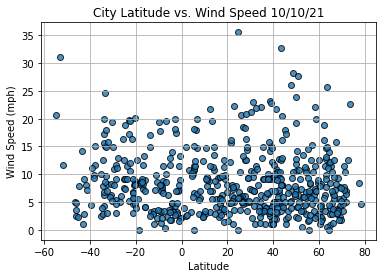

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [46]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-10-10 21:05:18
Lat                        -33.65
Lng                      115.3333
Max Temp                    55.09
Humidity                       73
Cloudiness                     96
Wind Speed                  15.12
Name: 13, dtype: object

In [47]:
city_data_df[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Katsuura,JP,2021-10-10 21:09:09,35.1333,140.3000,71.71,71,77,12.95
2,Staraya Poltavka,RU,2021-10-10 21:10:09,50.4772,46.4814,45.34,51,0,4.14
3,Chokurdakh,RU,2021-10-10 21:06:26,70.6333,147.9167,17.51,89,100,5.79
4,Hilo,US,2021-10-10 21:10:09,19.7297,-155.0900,80.28,90,90,8.05
5,Albany,US,2021-10-10 21:10:10,42.6001,-73.9662,66.16,79,95,6.55


In [61]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]


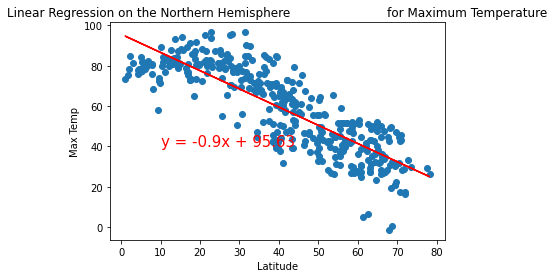

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

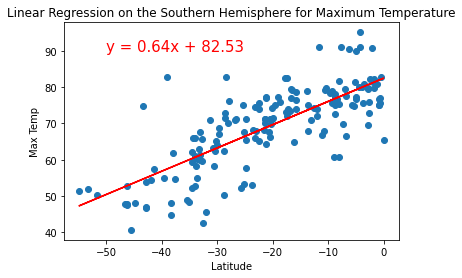

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp",(-50,90))

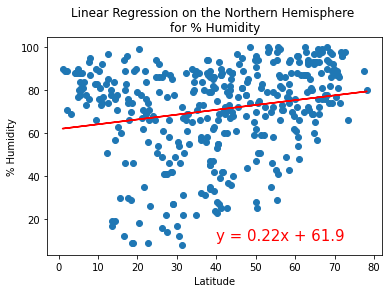

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor % Humidity', "% Humidity", (40,10))

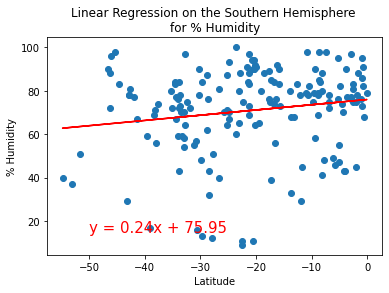

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \nfor % Humidity", "% Humidity", (-50,15))

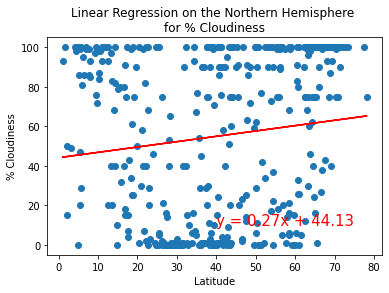

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', "% Cloudiness", (40,10))

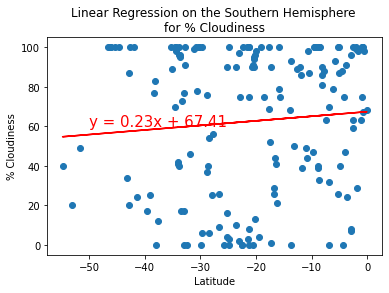

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \nfor % Cloudiness", "% Cloudiness", (-50,60))

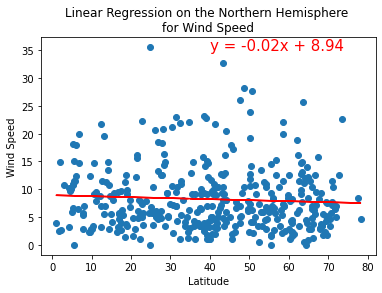

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \nfor Wind Speed", "Wind Speed", (40,35))

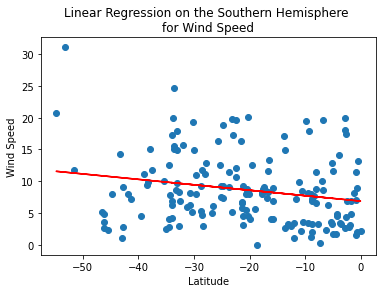

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))